Trabalho 1

Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\dot C = -e^{-\frac{10}{T+273}}*C$ 

$\dot T = 1000 * e^{-\frac{10}{T+273}}*C - 10 * (T-20)$ 

Sistema de equações

In [2]:
def sistema(x, t):
        f1, f2 = x
        dx1dt = -np.exp((-10)/(f2+273))*f1
        dx2dt = (1000*np.exp((-10)/(f2+273))*f1)-(10*(f2-20))
        return np.array([dx1dt, dx2dt])

Função para solucionar EDO usando Runge-Kutta clássico de 4ª ordem

In [3]:
def rk4(f, x0, t):
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(x[i-1], t[i-1])
        k2 = f(x[i-1] + 0.5*dt*k1, t[i-1] + 0.5*dt)
        k3 = f(x[i-1] + 0.5*dt*k2, t[i-1] + 0.5*dt)
        k4 = f(x[i-1] + dt*k3, t[i])
        x[i] = x[i-1] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x

Condições iniciais:

In [4]:
Tini = 35 # temperatura inicial em graus Celsius
Cini = 5 # concentração inicial em gmol/L

x0 = [Cini, Tini] # vetor de condições iniciais
t = np.linspace(0, 10, 1001) # vetor de tempo de 0 a 10 segundos com 1001 pontos, ou seja, com um passo de 0.01 segundos

Obtem a solução:

In [5]:
solucao = rk4(sistema, x0, t)

Plota o resultado:

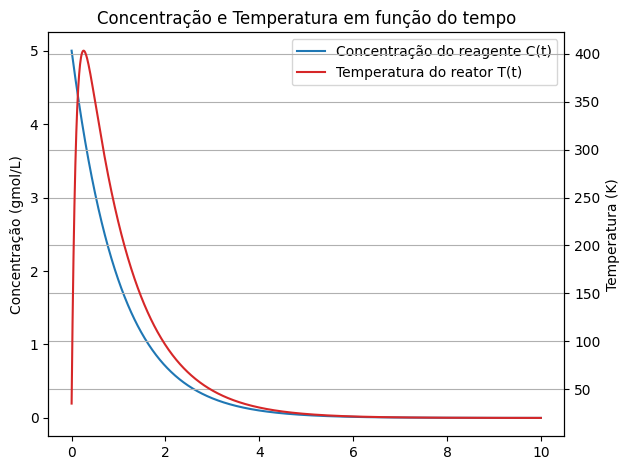

In [6]:

fig, ax = plt.subplots()

plotC = ax.plot(t, solucao[:, 0],
             label='Concentração do reagente C(t)', color='tab:blue') # plota o gráfico da concentração

ax2 = ax.twinx()
plotT = ax2.plot(t, solucao[:, 1], label='Temperatura do reator T(t)', color='tab:red') 

ax.set_ylabel('Concentração (gmol/L)')
ax2.set_ylabel('Temperatura (K)')
plt.xlabel('Tempo (s)')
plt.title('Concentração e Temperatura em função do tempo')
plt.grid()
ax.legend(handles=[plotC[0], plotT[0]])
fig.tight_layout()
plt.show()

Validando o resultado:

Utilizando pacotes conhecidos do python como o sympy.solve_ivp utilizando o método Runge-Kutta 45

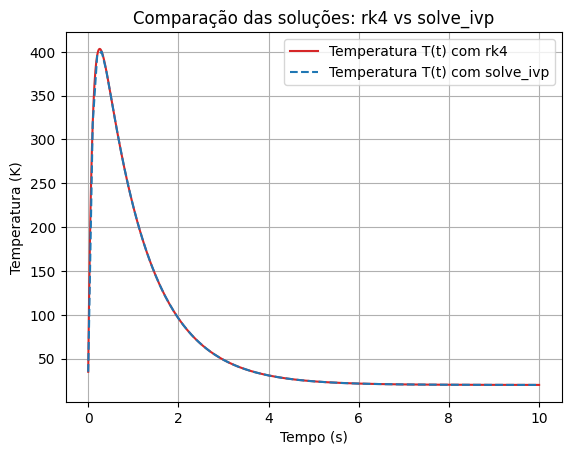

In [7]:
from scipy.integrate import solve_ivp

def sistema_ivp(t, x):
    f1, f2 = x
    dx1dt = -np.exp((-10)/(f2+273))*f1
    dx2dt = (1000*np.exp((-10)/(f2+273))*f1)-(10*(f2-20))
    return [dx1dt, dx2dt]

sol_ivp = solve_ivp(sistema_ivp, [0, 10], x0, t_eval=np.linspace(0, 10, 101))

plt.figure()
plt.plot(t, solucao[:, 1], label='Temperatura T(t) com rk4', color='tab:red')
plt.plot(sol_ivp.t, sol_ivp.y[1], '--', label='Temperatura T(t) com solve_ivp', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
titulo = 'Comparação das soluções: rk4 vs solve_ivp'
plt.title(titulo)
plt.legend()
plt.grid()
plt.savefig('docs/img/trab1/'+titulo+'.png')

Comparando os passos de tempo para solução:

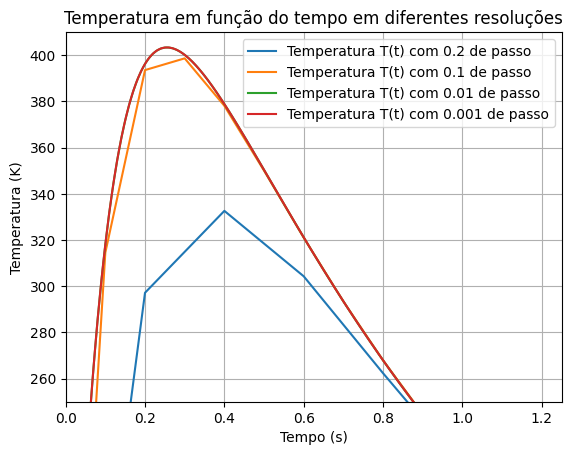

In [8]:
Tini = 35  # temperatura inicial em graus Celsius
Cini = 5  # concentração inicial em gmol/L

x0 = [Cini, Tini]  # vetor de condições iniciais
t = [np.linspace(0, 10, 51), np.linspace(0, 10, 101), np.linspace(0, 10, 1001), np.linspace(0, 10, 10001)]  # vetor de tempo de 0 a 10 segundos com diferentes resoluções

solucao = [rk4(sistema, x0, tempo) for tempo in t]

for tempo, sol in zip(t, solucao):
    plt.plot(tempo, sol[:, 1], label=f'Temperatura T(t) com {tempo[-1]/(len(tempo)-1)} de passo')  # plota o gráfico da temperatura

titulo = 'Temperatura em função do tempo em diferentes resoluções'
plt.title(titulo)
plt.axis([0, 1.25, 250, 410])
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('docs/img/trab1/'+titulo+'.png')

Plotando para diferentes condições iniciais

In [9]:
Tini = np.arange(15, 36, 1)  # temperatura inicial em graus Celsius
Cini = np.arange(5, 36, 1)  # concentração inicial em gmol/L

x0 = [Cini, Tini]  # vetor de condições iniciais
t = np.linspace(0, 10, 101)  # vetor de tempo de 0 a 10 segundos com diferentes resoluções

solucao = np.array([[rk4(sistema, [C, T], t) for C in Cini] for T in Tini])

for i, T in enumerate(Tini):
    for j, C in enumerate(Cini):
        titulo = f'Temperatura inicial {T}ºC e concentração inicial {C}gmol-L'
        
        fig, ax = plt.subplots()

        plotC = ax.plot(t, solucao[i, j][:, 0],
                    label='Concentração do reagente C(t)', color='tab:blue') 

        ax2 = ax.twinx()
        plotT = ax2.plot(t, solucao[i, j][:, 1], label='Temperatura do reator T(t)', color='tab:red') 

        ax.set_ylabel('Concentração (gmol/L)')
        ax2.set_ylabel('Temperatura (K)')
        plt.xlabel('Tempo (s)')
        plt.title('Concentração e Temperatura em função do tempo')
        plt.grid()
        ax.legend(handles=[plotC[0], plotT[0]])
        fig.tight_layout()
        plt.savefig('docs/img/trab1/'+titulo+'.png')




Comparando pequenas variações nas condições iniciais:

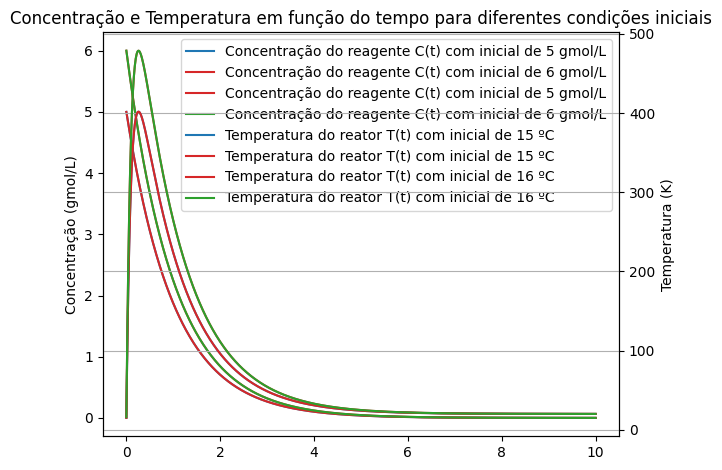

In [16]:
Tini = np.arange(15, 17, 1)  # temperatura inicial em graus Celsius
Cini = np.arange(5, 7, 1)  # concentração inicial em gmol/L

x0 = [Cini, Tini]  # vetor de condições iniciais
t = np.linspace(0, 10, 1001)  # vetor de tempo de 0 a 10 segundos com diferentes resoluções

solucao = np.array([[rk4(sistema, [C, T], t) for C in Cini] for T in Tini])

fig, ax = plt.subplots()

ax2 = ax.twinx()

plotC = []
plotT = []
cor = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown']

for i, T in enumerate(Tini):
    for j, C in enumerate(Cini):
        plotC.append(ax.plot(t, solucao[i, j][:, 0],
                    label=f'Concentração do reagente C(t) com inicial de {C} gmol/L', color=cor[i+j]))

        plotT.append(ax2.plot(t, solucao[i, j][:, 1], label=f'Temperatura do reator T(t) com inicial de {T} ºC', color=cor[i+j]))

titulo = f'Temperatura inicial {Tini} ºC e concentração inicial {Cini} gmol/L'
ax.set_ylabel('Concentração (gmol/L)')
ax2.set_ylabel('Temperatura (K)')
plt.xlabel('Tempo (s)')
titulo = 'Concentração e Temperatura em função do tempo para diferentes condições iniciais'
plt.title(titulo)
plt.grid()

# Ajustando as legendas para garantir que todas as linhas sejam identificáveis
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2)

fig.tight_layout()
# plt.show()
plt.savefig('docs/img/trab1/'+titulo+'.png')